In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-dark-palette')
from scipy import stats

import datetime as dt

import warnings
warnings.filterwarnings('ignore')


## <font color = Green > Problem Statement </font>

Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

## <font color = Green > Business Goal </font>

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

1. Which type of hosts to acquire more and where?
2. The categorisation of customers based on their preferences.
    - What are the neighbourhoods they need to target?
    - What is the pricing ranges preferred by customers?
    - The various kinds of properties that exist w.r.t. customer preferences.
    - Adjustments in the existing properties to make it more customer-oriented.
3. What are the most popular localities and properties in New York currently?
4. How to get unpopular properties more traction? and so on...

## <font color = Green > Objectives </font>

To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York. Based on this analysis, you need to give two presentations to the following groups.

1. Presentation - I
+ **Data Analysis Managers:** These people manage the data analysts directly for processes and their technical expertise is basic.
+ **Lead Data Analyst:** The lead data analyst looks after the entire team of data and business analysts and is technically sound.

2. Presentation - II
+ **Head of Acquisitions and Operations, NYC:** This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
+ **Head of User Experience, NYC:** The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

## <font color = Green > Steps Followed </font>

+ **Data Understanding, Preparation, and Pre-Processing :**
     - Reading Data
     - Assigning correct datatypes 
     - Treating Missing values 
     - Treating outlier 
     
+ **Variable Transformation :**
     - Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
+ **Exploratory Data Analysis :**
     - Univariate Analysis(Numerical)
     - Univariate Analysis( Categorical)

In [2]:
# read the dataset
airbnb= pd.read_csv("AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
# Dimensions

airbnb.shape

(48895, 16)

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### <font color = Green > Insights: </font>

+ There are 3 floats, 7 integers and 6 objects data type values in the data. 
+ Only 4 columns with null values, we will deal with it .
+ id and host id should be of datatype object.

In [5]:
# Converting id to object

airbnb['id'] = airbnb.id.astype(str)

In [6]:
# Converting host_id to object

airbnb['host_id'] = airbnb.host_id.astype(str)

In [7]:
# Recheck 
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Analysing categorical values

airbnb.select_dtypes(include=['object']).describe()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48879,48895,48874,48895,48895,48895,38843
unique,48895,47896,37457,11452,5,221,3,1764
top,2539,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,Entire home/apt,23-06-2019
freq,1,18,327,417,21661,3920,25409,1413


In [9]:
# Analysing Numerical values
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### <font color = Green > Insights: </font>

+ Minimum price is 0 and maximum of 10,000 so we need to check why the value is 0 and for which zone value is 10,000. 
+ There seem to huge variance in minimum_nights, number_of_reviews, reviews_per_month and calculated_host_listings_count columns whic shows presence of outlier and thus we will go through each of the mentioned column to validate the reason. 
+ Hillside Hotel is the top place which is the Entire home/apt room type. 
+ This place is hosted by Michael. 

In [10]:
# Re read data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Handling Missing Values

In [11]:
# Null Values percentage in each columns
x= (airbnb.isnull().sum()/len(airbnb)*100).sort_values(ascending=False)
x

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

First , for column "last review" and "reviews_per_month" we need to check why there are null values and for that we will need to check column "number_of_reviews" if there are any host who have not received any review.

In [12]:
print(len(airbnb[airbnb.number_of_reviews == 0]))

10052


### <font color = Green > Insights: </font>

+ The values missing in last_review and reviews_per_month carrying NaN values is on purpose meaning they are not missing at random as these hosted sites/places have not receive any reviews from the customers. Hence, these placess would be least preferred by the future customers and would also be facing bad business from our side. 
+ There are in all 10052 unreviewed hosted sites on the account which is around 20% ( 10052/48895=20.55%)of all hosted sites.  

In [13]:
# Replacing the missing values of reviews_per_month with a zero 

airbnb["reviews_per_month"] = airbnb.reviews_per_month.fillna(0)

In [14]:
#We will convert "Last-Review" columns to pandas dataframe and extract year ,Month and Day 

airbnb['last_review_year'] = pd.DatetimeIndex(airbnb['last_review']).year
airbnb['last_review_month'] = pd.DatetimeIndex(airbnb['last_review']).month
airbnb['last_review_day'] = pd.DatetimeIndex(airbnb['last_review']).day

In [15]:
# Dropping the original last_review column

airbnb.drop('last_review', axis=1, inplace=True)

In [16]:
# Replacing the remaining missing values with a Not Reviewed option

airbnb['last_review_year'] = airbnb.last_review_year.fillna("Not Reviewed")
airbnb['last_review_month'] = airbnb.last_review_month.fillna("Not Reviewed")
airbnb['last_review_day'] = airbnb.last_review_day.fillna("Not Reviewed")

In [17]:
# checking datatype of newly created column
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [18]:
# Recheck Null values
(airbnb.isnull().sum()/len(airbnb)*100).sort_values(ascending=False)

host_name                         0.042949
name                              0.032723
id                                0.000000
minimum_nights                    0.000000
last_review_month                 0.000000
last_review_year                  0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
reviews_per_month                 0.000000
number_of_reviews                 0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
last_review_day                   0.000000
dtype: float64

In [19]:
airbnb[airbnb.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,0.45,1,88,2019.0,8.0,7.0
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,0.69,1,342,2017.0,2.0,1.0
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,Not Reviewed,Not Reviewed,Not Reviewed
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.45,1,341,2015.0,8.0,6.0
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,1.00,1,359,2019.0,5.0,23.0
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,0.02,1,0,2015.0,1.0,1.0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,0.09,1,0,2016.0,2.0,1.0
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0.00,1,0,Not Reviewed,Not Reviewed,Not Reviewed
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0.00,1,0,Not Reviewed,Not Reviewed,Not Reviewed
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0.00,1,0,Not Reviewed,Not Reviewed,Not Reviewed


### <font color = Green > Insights: </font>

+ Here, we can see 21 host name and 16 of its places are missing values
 
+ Looking at all those missing values it looks like it was missed by chance and as these values are very very less which is 0.03% we can impute it with mode being categorical columns

In [20]:
airbnb['host_name'].fillna(airbnb['host_name'].mode()[0], inplace=True)

In [21]:
airbnb['name'].fillna(airbnb['name'].mode()[0], inplace=True)

In [22]:
# recheck null values
(airbnb.isnull().sum()/len(airbnb)*100).sort_values(ascending=False)

id                                0.0
name                              0.0
last_review_month                 0.0
last_review_year                  0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_name                         0.0
host_id                           0.0
last_review_day                   0.0
dtype: float64

### <font color = Green > Insights: </font>

+ Now, we have dealt with all null values

### Handling Outliers

In [23]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

### <font color = Green > Insights: </font>

+ Columns having numerical values excluding latitude and longitude  are "price" , "minimum_nights", "number_of_reviews","reviews_per_month","calculated_host_listings_count" and "availability_365"

In [24]:
# Describe
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


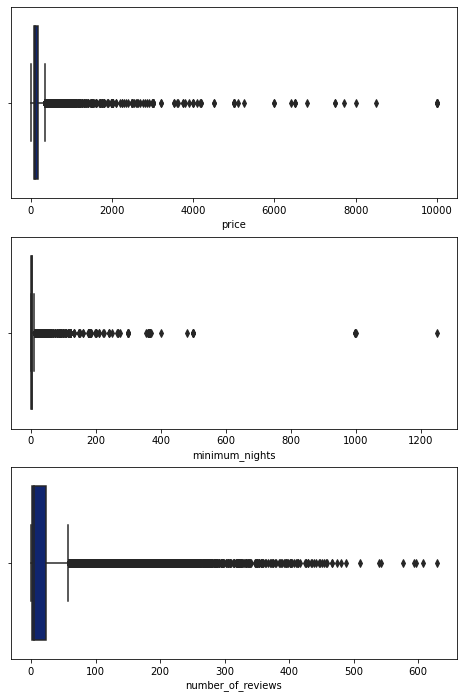

In [25]:
plt.figure(figsize = (8,12))

plt.subplot(3,1,1)
sns.boxplot(airbnb['price'])

plt.subplot(3,1,2)
sns.boxplot(airbnb['minimum_nights'])

plt.subplot(3,1,3)
sns.boxplot(airbnb['number_of_reviews'])
plt.show()



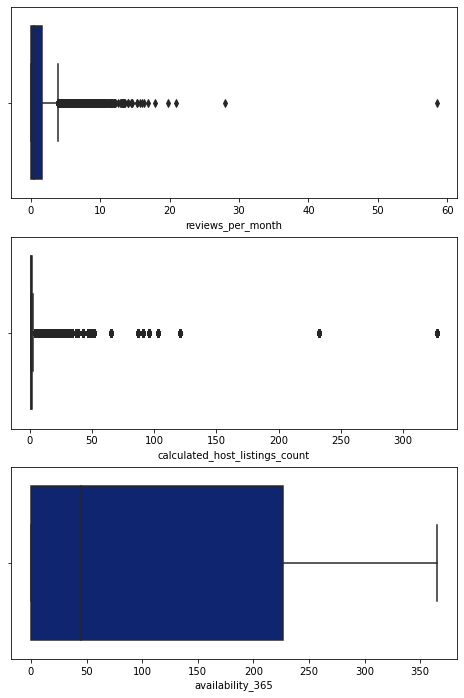

In [26]:
plt.figure(figsize = (8,12))
plt.subplot(3,1,1)
sns.boxplot(airbnb['reviews_per_month'])

plt.subplot(3,1,2)
sns.boxplot(airbnb['calculated_host_listings_count'])

plt.subplot(3,1,3)
sns.boxplot(airbnb['availability_365'])
plt.show()

### <font color = Green > Insights: </font>

+ Except " availability_365" each column has outliers and we will deal with each one of these by capping

In [27]:
# Capping (statistical) outliers

# outlier treatment for price: 
Q1 = airbnb.price.quantile(0.10) 
Q3 = airbnb.price.quantile(0.90) 
IQR = Q3 - Q1  
airbnb = airbnb[(airbnb.price >= Q1 - 1.5*IQR) & (airbnb.price <= Q3 + 1.5*IQR)]

# outlier treatment for minimum_nights: 
Q1 = airbnb.minimum_nights.quantile(0.10) 
Q3 = airbnb.minimum_nights.quantile(0.90) 
IQR = Q3 - Q1  
airbnb = airbnb[(airbnb.minimum_nights >= Q1 - 1.5*IQR) & (airbnb.minimum_nights <= Q3 + 1.5*IQR)]

# outlier treatment for number_of_reviews: 
Q1 = airbnb.number_of_reviews.quantile(0.10) 
Q3 = airbnb.number_of_reviews.quantile(0.90) 
IQR = Q3 - Q1  
airbnb = airbnb[(airbnb.number_of_reviews >= Q1 - 1.5*IQR) & (airbnb.number_of_reviews <= Q3 + 1.5*IQR)]

# outlier treatment for reviews_per_month: 
Q1 = airbnb.reviews_per_month.quantile(0.10) 
Q3 = airbnb.reviews_per_month.quantile(0.90) 
IQR = Q3 - Q1  
airbnb = airbnb[(airbnb.reviews_per_month >= Q1 - 1.5*IQR) & (airbnb.reviews_per_month <= Q3 + 1.5*IQR)]

# outlier treatment for calculated_host_listings_count: 
Q1 = airbnb.calculated_host_listings_count.quantile(0.10) 
Q3 = airbnb.calculated_host_listings_count.quantile(0.90) 
IQR = Q3 - Q1  
airbnb = airbnb[(airbnb.calculated_host_listings_count >= Q1 - 1.5*IQR) & 
                (airbnb.calculated_host_listings_count <= Q3 + 1.5*IQR)]

In [28]:
# recheck with describe and boxplot
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,43912.000000,43912.000000,43912.000000,43912.000000,43912.000000,43912.000000,43912.000000,43912.000000
mean,40.728127,-73.950958,130.918496,4.941519,20.135248,1.035923,1.710444,99.108421
std,0.055684,0.046060,90.573400,7.605380,32.648184,1.398766,1.555874,125.394263
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.688810,-73.981680,68.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,40.721200,-73.954385,100.000000,2.000000,5.000000,0.390000,1.000000,28.000000
75%,40.763580,-73.934820,167.000000,4.000000,23.000000,1.540000,2.000000,180.000000
max,40.913060,-73.712990,599.000000,68.000000,177.000000,7.720000,11.000000,365.000000


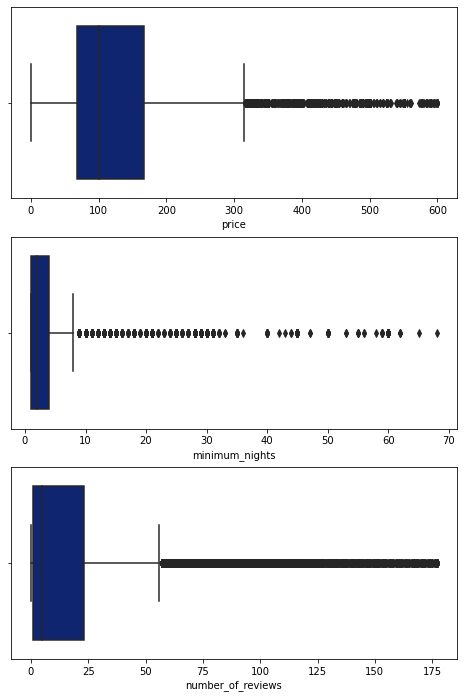

In [29]:
plt.figure(figsize = (8,12))

plt.subplot(3,1,1)
sns.boxplot(airbnb['price'])

plt.subplot(3,1,2)
sns.boxplot(airbnb['minimum_nights'])

plt.subplot(3,1,3)
sns.boxplot(airbnb['number_of_reviews'])
plt.show()

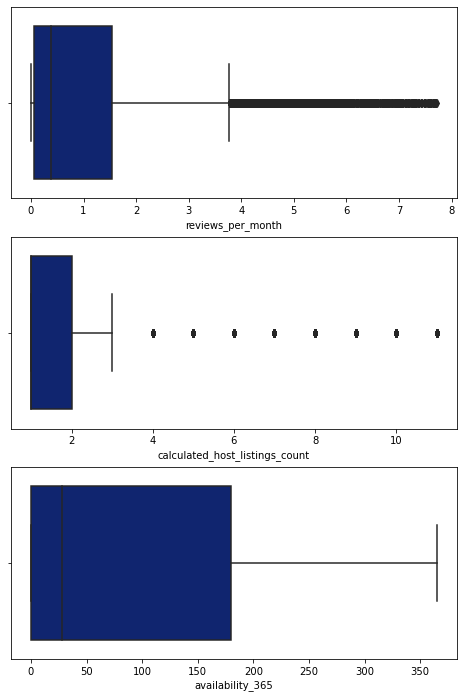

In [30]:
plt.figure(figsize = (8,12))
plt.subplot(3,1,1)
sns.boxplot(airbnb['reviews_per_month'])

plt.subplot(3,1,2)
sns.boxplot(airbnb['calculated_host_listings_count'])

plt.subplot(3,1,3)
sns.boxplot(airbnb['availability_365'])
plt.show()

### <font color = Green > Insights: </font>

+ We have dealt with outliers and we can proceed with EDA.

# <font color = blue> Variable Transformation </font>

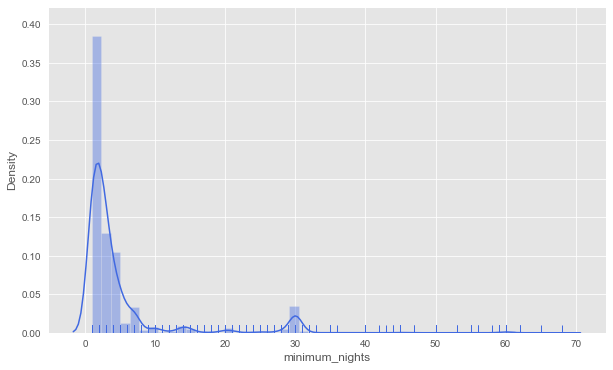

In [31]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(airbnb['minimum_nights'], rug = True, color = 'royalblue')
plt.show()

In [32]:
# Creating minimum_nights into binned groups and storing it in another column
airbnb["minimum_nights_range"] = pd.cut(airbnb.minimum_nights, 
                                  [0,10,20,30,40,50,60,70], 
                                  labels=["<10", "10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "60+"])
airbnb["minimum_nights_range"].value_counts()

<10         39759
20 to 30     2547
10 to 20     1249
30 to 40      194
50 to 60      112
40 to 50       46
60+             5
Name: minimum_nights_range, dtype: int64

In [33]:
# Converting minimum_nights_range to object datatype

airbnb['minimum_nights_range'] = airbnb.minimum_nights_range.astype(str)

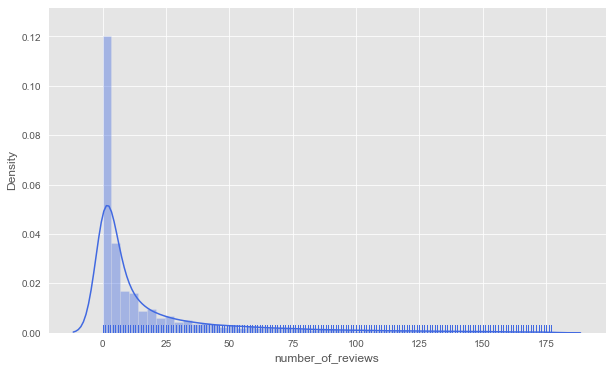

In [34]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(airbnb['number_of_reviews'], rug = True, color = 'royalblue')
plt.show()

In [35]:
# Creating number_of_reviews into binned groups and storing it in another column

airbnb["number_of_reviews_range"] = pd.cut(airbnb.number_of_reviews, 
                                                  [0,50,100,150,200], 
                                                  labels=["<50", "50 to 100", "100 to 150", "150+"])
airbnb["number_of_reviews_range"].value_counts()

<50           29634
50 to 100      3826
100 to 150     1595
150+            435
Name: number_of_reviews_range, dtype: int64

In [36]:
# Converting number_of_reviews_range to object datatype

airbnb['number_of_reviews_range'] = airbnb.number_of_reviews_range.astype(str)

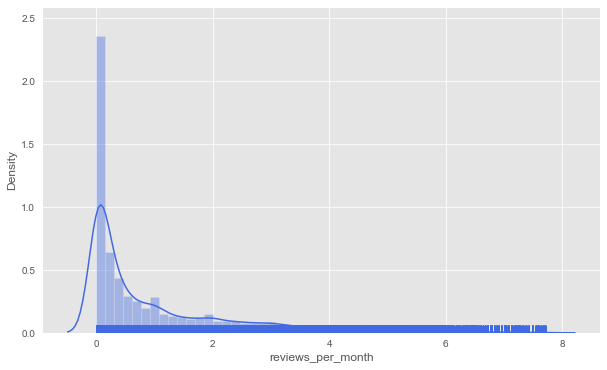

In [37]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(airbnb['reviews_per_month'], rug = True, color = 'royalblue')
plt.show()

In [38]:
# Creating reviews_per_month into binned groups and storing it in another column

airbnb["reviews_per_month_range"] = pd.cut(airbnb.reviews_per_month, 
                                                  [0,2,4,6,8],
                                                  labels=["<2", "2 to 4", "4 to 6", "6+"])
airbnb["reviews_per_month_range"].value_counts()

<2        27064
2 to 4     6120
4 to 6     1914
6+          392
Name: reviews_per_month_range, dtype: int64

In [39]:
# Converting reviews_per_month_range to object datatype

airbnb['reviews_per_month_range'] = airbnb.reviews_per_month_range.astype(str)

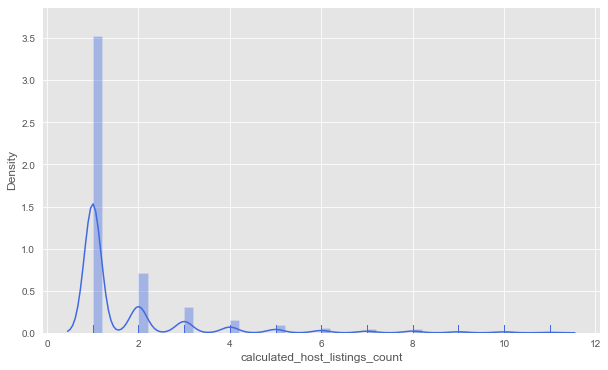

In [40]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(airbnb['calculated_host_listings_count'], rug = True, color = 'royalblue')
plt.show()

In [41]:
# Creating calculated_host_listings_count into binned groups and storing it in another column

airbnb["calculated_host_listings_range"] = pd.cut(airbnb.calculated_host_listings_count, 
                                                  [0,3,6,9,12], 
                                                  labels=["<3", "3 to 6", "6 to 9", "9+"])
airbnb["calculated_host_listings_range"].value_counts()

<3        39934
3 to 6     2679
6 to 9     1005
9+          294
Name: calculated_host_listings_range, dtype: int64

In [42]:
# Converting calculated_host_listings_range to object datatype

airbnb['calculated_host_listings_range'] = airbnb.calculated_host_listings_range.astype(str)

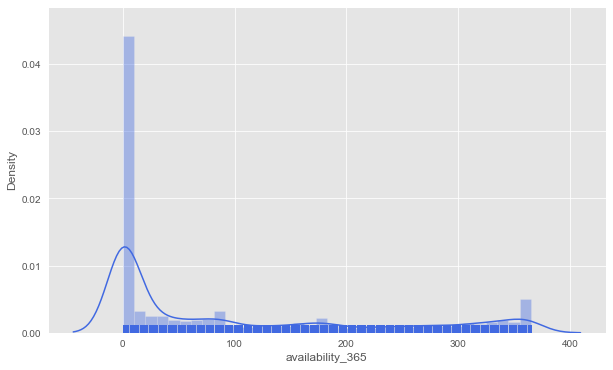

In [43]:
sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(airbnb['availability_365'], rug = True, color = 'royalblue')
plt.show()

In [44]:
# Creating availability_365 into binned groups and storing it in another column
airbnb["availability_365_range"] = pd.cut(airbnb.availability_365, 
                                                  [0,100,200,300,400], 
                                                  labels=["<100", "100 to 200", "200 to 300", "300+"])
airbnb["availability_365_range"].value_counts()

<100          11556
300+           5921
100 to 200     5170
200 to 300     4116
Name: availability_365_range, dtype: int64

In [45]:
# Converting availability_365_range to object datatype

airbnb['availability_365_range'] = airbnb.availability_365_range.astype(str)

In [46]:
# Recheck datatypes
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43912 entries, 0 to 48894
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43912 non-null  object 
 1   name                            43912 non-null  object 
 2   host_id                         43912 non-null  object 
 3   host_name                       43912 non-null  object 
 4   neighbourhood_group             43912 non-null  object 
 5   neighbourhood                   43912 non-null  object 
 6   latitude                        43912 non-null  float64
 7   longitude                       43912 non-null  float64
 8   room_type                       43912 non-null  object 
 9   price                           43912 non-null  int64  
 10  minimum_nights                  43912 non-null  int64  
 11  number_of_reviews               43912 non-null  int64  
 12  reviews_per_month               

In [47]:
# Extracting the modified version for Tableau demonstartion 

airbnb.to_csv('AB_NYC_2019(Modified).csv',index=False)


# <font color = blue> Exploratory Data Analysis </font>

In [48]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,minimum_nights_range,number_of_reviews_range,reviews_per_month_range,calculated_host_listings_range,availability_365_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,6,365,2018.0,10.0,19.0,<10,<50,<2,3 to 6,300+
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,2019.0,5.0,21.0,<10,<50,<2,<3,300+
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1,365,Not Reviewed,Not Reviewed,Not Reviewed,<10,nan,nan,<3,300+
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,2018.0,11.0,19.0,<10,<50,<2,<3,nan
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,1,129,2019.0,6.0,22.0,<10,50 to 100,<2,<3,100 to 200


### Univariate  Analysis(Numerical): 

In [49]:
int_cols = airbnb.select_dtypes(include=['int64', 'float64']).columns
list(enumerate(int_cols))

[(0, 'latitude'),
 (1, 'longitude'),
 (2, 'price'),
 (3, 'minimum_nights'),
 (4, 'number_of_reviews'),
 (5, 'reviews_per_month'),
 (6, 'calculated_host_listings_count'),
 (7, 'availability_365')]

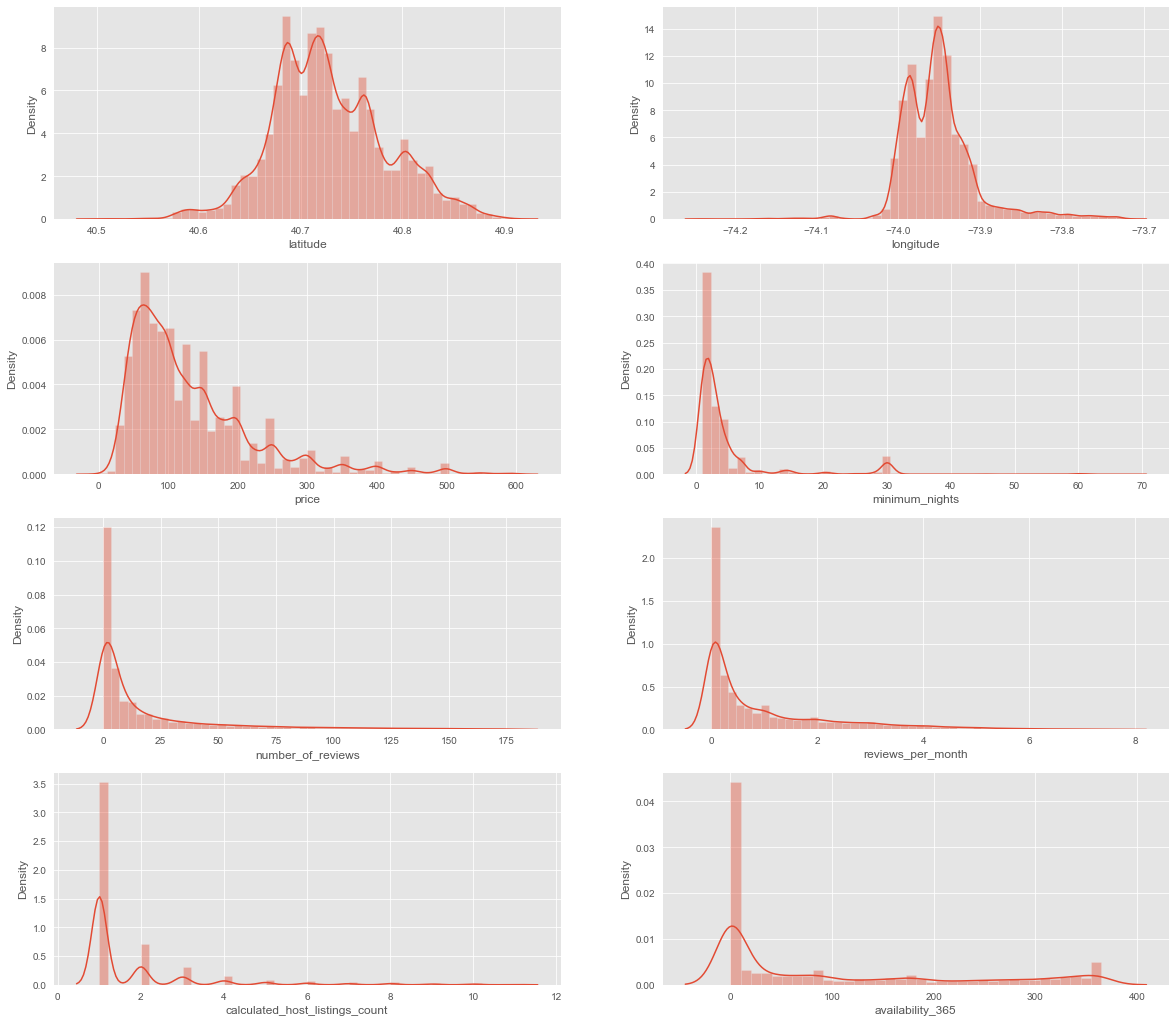

In [50]:
int_cols = airbnb.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=[20,18])

for n,col in enumerate(int_cols):
    plt.subplot(4,2,n+1)
    sns.distplot(airbnb[col])

### <font color = Green > Insights: </font>

+ majority of Price ranges from 10$ to 100$ and it some cases it goes upto 600 $
+ minimum nights which user spend is 1-3 days
+ Generally 1 review is given per month

### Univariate  Analysis(Categorial): 

In [51]:
cat_cols = airbnb.select_dtypes(include=['object']).columns
cat_cols

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'last_review_year', 'last_review_month',
       'last_review_day', 'minimum_nights_range', 'number_of_reviews_range',
       'reviews_per_month_range', 'calculated_host_listings_range',
       'availability_365_range'],
      dtype='object')

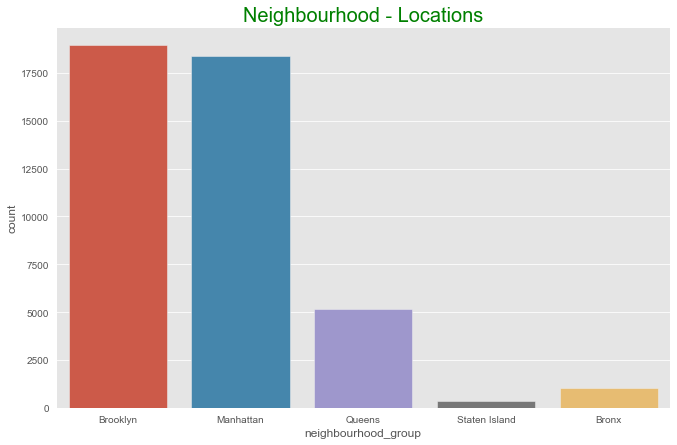

In [52]:
# Checking the count of sites Location 

plt.figure(figsize=[11,7])
sns.countplot(airbnb.neighbourhood_group)
plt.title('Neighbourhood - Locations', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

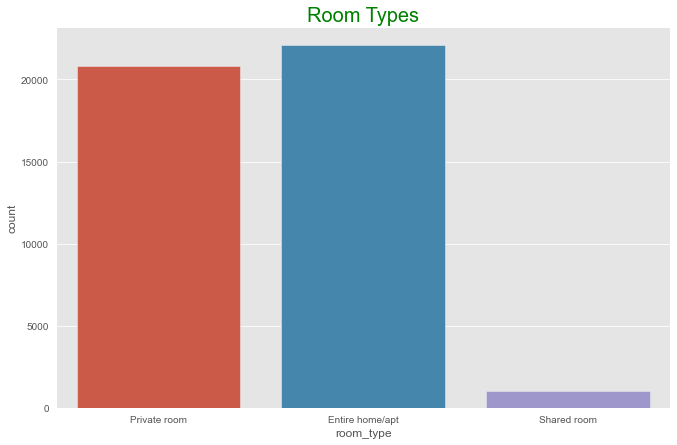

In [53]:
# Checking the count of Room Types

plt.figure(figsize=[11,7])
sns.countplot(airbnb.room_type)
plt.title('Room Types', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

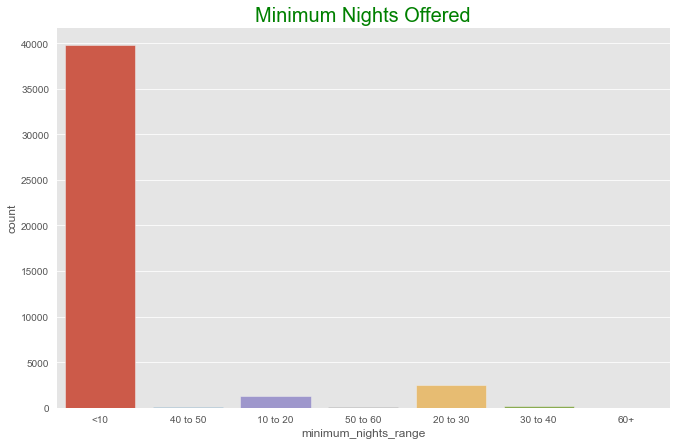

In [54]:
# Checking the count of Minimum Nights Offered 

plt.figure(figsize=[11,7])
sns.countplot(airbnb.minimum_nights_range)
plt.title('Minimum Nights Offered', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

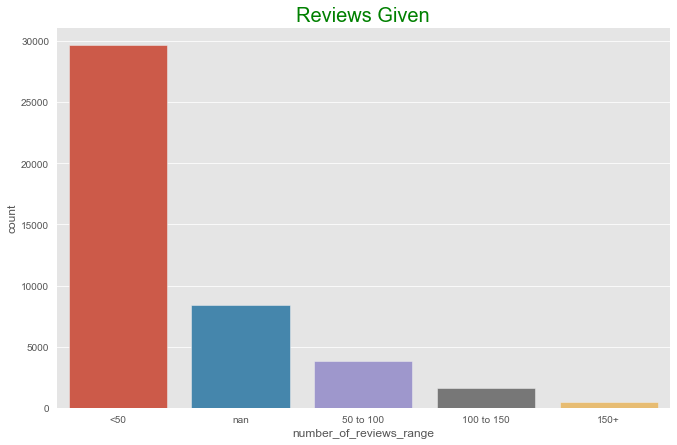

In [55]:
# Checking the count of Reviews Given

plt.figure(figsize=[11,7])
sns.countplot(airbnb.number_of_reviews_range)
plt.title('Reviews Given', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

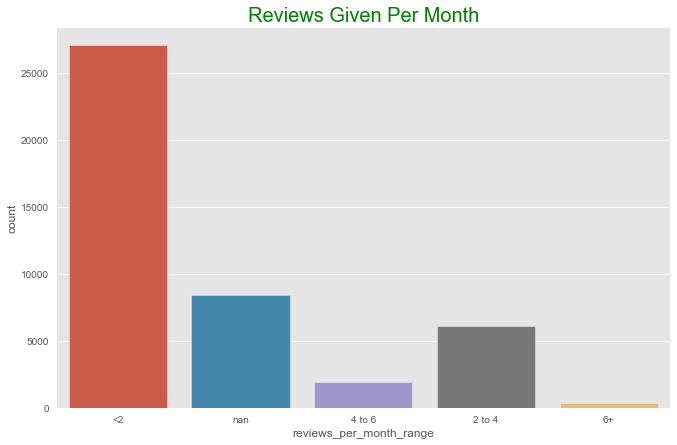

In [56]:
# Checking the count of Reviews Given Per Month

plt.figure(figsize=[11,7])
sns.countplot(airbnb.reviews_per_month_range)
plt.title('Reviews Given Per Month', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

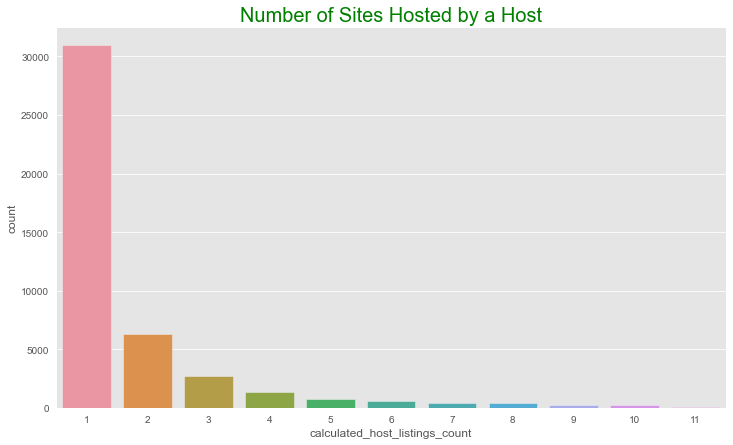

In [57]:
# Checking the count of Number of Sites Hosted by a Host 

plt.figure(figsize=[12,7])
sns.countplot(airbnb.calculated_host_listings_count)
plt.title('Number of Sites Hosted by a Host', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

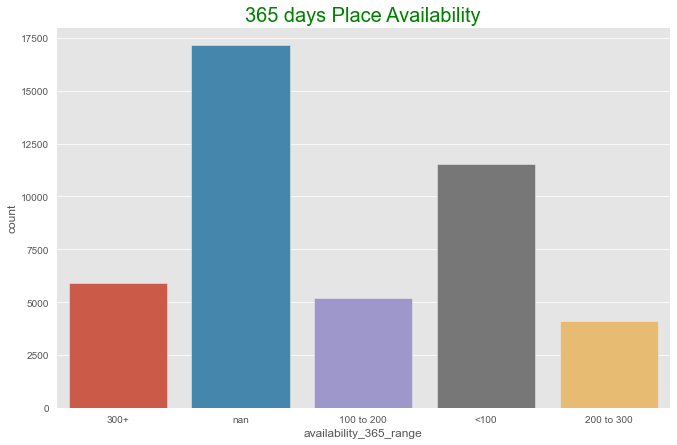

In [58]:
# Checking the count of 365 days Place Availability  

plt.figure(figsize=[11,7])
sns.countplot(airbnb.availability_365_range)
plt.title('365 days Place Availability', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

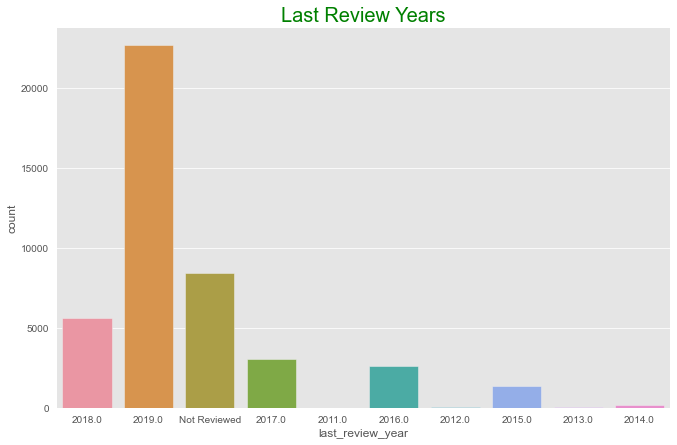

In [59]:
# Checking the count of Last Review Years 

plt.figure(figsize=[11,7])
sns.countplot(airbnb.last_review_year)
plt.title('Last Review Years', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

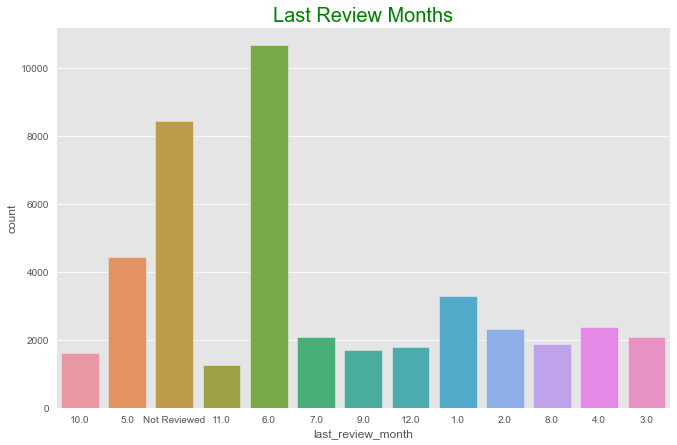

In [60]:
# Checking the count of Last Review Months

plt.figure(figsize=[11,7])
sns.countplot(airbnb.last_review_month)
plt.title('Last Review Months', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

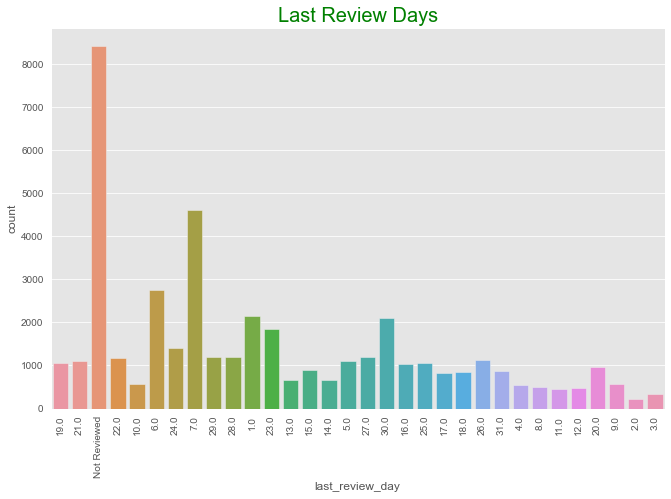

In [61]:
# Checking the count of Last Review Days

plt.figure(figsize=[11,7])
sns.countplot(airbnb.last_review_day)
plt.title('Last Review Days', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.xticks(rotation=90)
plt.show()

### <font color = Green > Insights: </font>

+ Broklyn, Manhatten and Queens are dominating when it comes to listed hostings.
+ Majorly Private rooms or Entire apartment are provided by host.
+ Majority of the sites provide less than 10 nights stay at a time. 
+ Majority of the sites have received less than 50 reviews till date.
+ Most the sites have receieved less than 2 reviews per month which indicates bad customer experience offered by majority sites.
+ Majority of the Host have 1 site hosted by them on the platform. 
+ Most of the sites hosted provide 0 days availability which needs to be checked and then most of the site have less than 100 days availabilty compared to all 365 days.  
+ Slowly and gradually reviews started to build up and was mostly in 2018 and 2019.
+ 6th month of the year i.e June seems to recieve most of the last reviews in all years followed by 5th month.
+ Most of the times last reviews were not provided when we see Day wise. Next, majority of times it was provided on the 6th and 7th day of the month followed by 1st and last day of the month.

